## Presenter notes with Carpentries Python Gapminder training
*Martijn Wehrens, m.wehrens@uva.nl, 2025-03-04*

### Modifications to this lesson

This material was modified to include `matplotlib.pyplot` and `seaborn`, two commonly used tools, and exclude the `pandas.DataFrame.plot`, which we think is less commonly used.

## Plotting 

Text(0, 0.5, 'Position (km)')

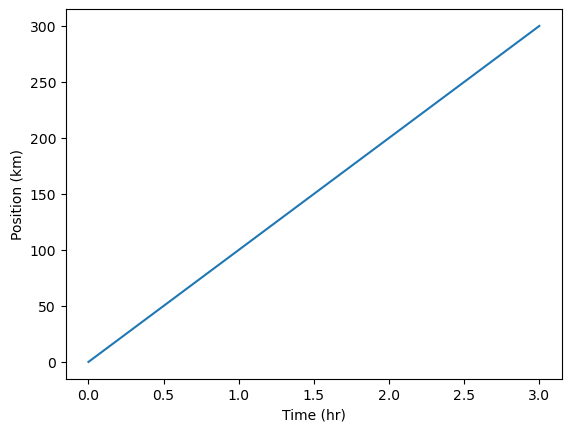

In [1]:
# matplotlib most widely used
    # or sub library "pyplot"
    # will render inline by default

import matplotlib.pyplot as plt

# simple plot

time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

In [ ]:
# when running python differently
    # e.g. terminal
    # also need "plt.show()" 
        # and also plt.close()
        


In [ ]:
# Can also use "seaborn"
    # Based on matplotlib
        # Usually used together
    # Additional features geared towards dfs

# How to install seaborn in Jupyter
%pip install seaborn
    # only needed in online version
    # done differently locally


<Axes: xlabel='None', ylabel='Australia'>

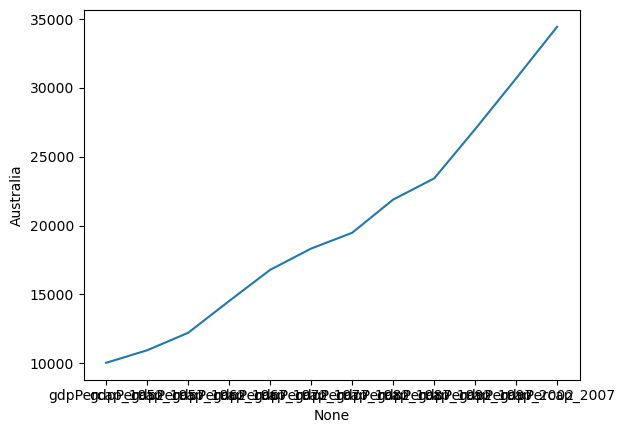

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_oceania.csv', index_col='country')

data.head()

sns.lineplot(x=data.columns, y = data.loc['Australia',:])
# plt.show(); plt.close()

# why do we see ugly axis?
    # we'll do something about this later


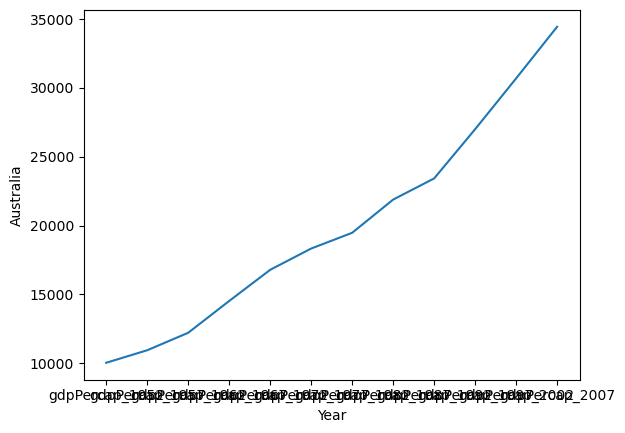

In [7]:
    
# more convenient:
    # dfs as input directly
    # certain expecations from the data
    # series to plot should be in columns
    
    # re-arrange our df
        
data_transposed = data.T
data_transposed['Year'] = data.columns
data_transposed.head()

sns.lineplot(data_transposed, x='Year', y = 'Australia')
plt.show(); plt.close()


In [8]:

# more re-arrangements needed for full options

# "long format"

    # column = variable or condition
    # row = measurement
    
    # Current format:
    # country           Australia  New Zealand            Year
    # gdpPercap_1952  10039.59564  10556.57566  gdpPercap_1952
    # gdpPercap_1957  10949.64959  12247.39532  gdpPercap_1957
    # gdpPercap_1962  12217.22686  13175.67800  gdpPercap_1962
    # gdpPercap_1967  14526.12465  14463.91893  gdpPercap_1967
    # gdpPercap_1972  16788.62948  16046.03728  gdpPercap_1972
    # (..)
    #
    # Goal:
    #             Year      Country          GDP
    # 0   gdpPercap_1952    Australia  10039.59564
    # 1   gdpPercap_1957    Australia  10949.64959
    # 2   gdpPercap_1962    Australia  12217.22686
    # 3   gdpPercap_1967    Australia  14526.12465
    # 4   gdpPercap_1972    Australia  16788.62948
    # 5   gdpPercap_1977    Australia  18334.19751
    # 6   gdpPercap_1982    Australia  19477.00928
    # 7   gdpPercap_1987    Australia  21888.88903
    # 8   gdpPercap_1992    Australia  23424.76683
    # 9   gdpPercap_1997    Australia  26997.93657
    # 10  gdpPercap_2002    Australia  30687.75473
    # 11  gdpPercap_2007    Australia  34435.36744
    # 12  gdpPercap_1952  New Zealand  10556.57566
    # (..)

data_long = data_transposed.melt(id_vars='Year', var_name='Country', value_name='GDP')
    # id_vars: identifier variables
    #   identifying a specific observation
    #   keep those
    #       new id vars will be added, in this case country
    # var_name: name used the new id parameter
        # here, column names Australia, New Zealand ---> these are countries
    # value_name: name given to the values, which are taken from multiple columns
    # 
    #    - Identifier variables are called this because they uniquely **identify a specific observation** in the dataset. 
    #      These variables are not measured or calculated but instead serve to distinguish one observation from another.
    #    - In this example, `Year` and `Country` are identifier variables because they uniquely identify each observation 
    #      (e.g., GDP of Australia in 1952).

print(data_long.head())

# OPTIONAL ##########

data2 = data.copy()
data2['Country']=data2.index
data_long2 = data2.melt(id_vars='Country', var_name='Year', value_name='GDP')

    # Let's not go into technicalities
        # sometimes a = b
            # a "reference" is made
            # instead of new parameter
    # list1 = [1,2,3]
    # list2 = list1
    # list2[1] = 44
    # list1
    # list2
    
# END OPTIONAL ##########


             Year    Country          GDP
0  gdpPercap_1952  Australia  10039.59564
1  gdpPercap_1957  Australia  10949.64959
2  gdpPercap_1962  Australia  12217.22686
3  gdpPercap_1967  Australia  14526.12465
4  gdpPercap_1972  Australia  16788.62948


<Axes: xlabel='Year', ylabel='GDP'>

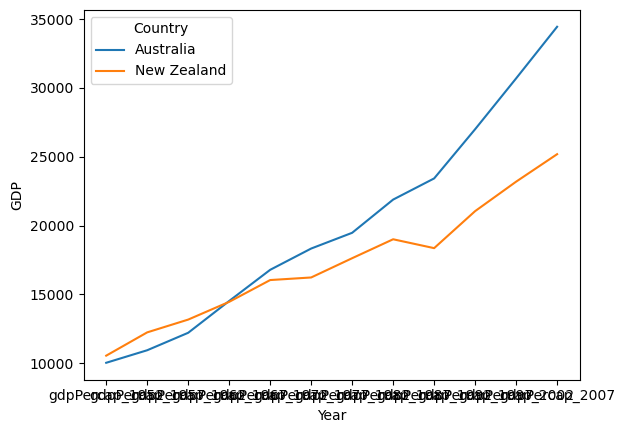

In [9]:

sns.lineplot(data_long, x='Year', y = 'GDP', hue='Country')
# plt.show(); plt.close()


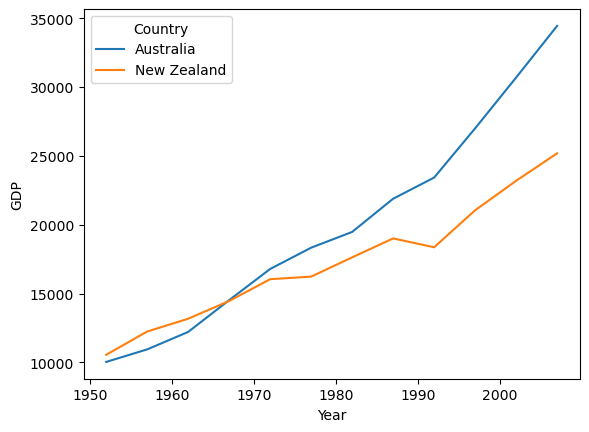

In [10]:

# Finally
    # Fix years

# search and replace
    # keep year
    # remove rest

years = data_long['Year'].str.replace('gdpPercap_', '')
    # MW:
    # "str" is a method which holds more methods 
        # related to string operations
        # str is also part of python standard library
        # stand-alone example: str.replace('hoi', 'oi', '') 

# convert to int
# put back in dataframe
data_long['Year'] = years.astype(int)

# Plot again
sns.lineplot(data_long, x='Year', y = 'GDP', hue='Country')
plt.show(); plt.close()

<Axes: xlabel='Year', ylabel='GDP'>

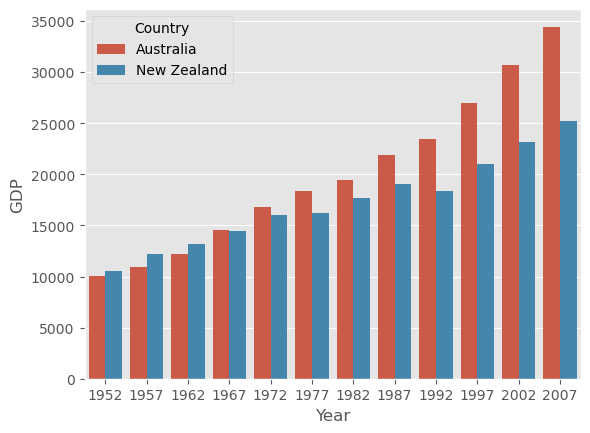

In [ ]:
# Change
    # Plot types
    # Style
    # Seaborn can be manipulated by matplotlib    

# Example
plt.style.use('ggplot')

# Other type, bars
sns.barplot(data_long, x='Year', y = 'GDP', hue='Country')

# use google to tweak
# for nice examples:
    # https://matplotlib.org/stable/gallery/ 
    # https://seaborn.pydata.org/examples/index.html


Text(0.5, 1.0, 'GDPs of different countries')

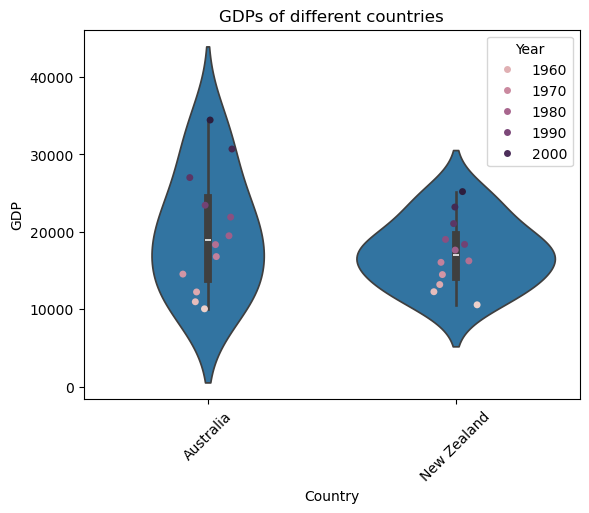

In [ ]:
# Something else

plt.style.use('default')
sns.violinplot(data_long, x='Country', y = 'GDP')
# OPTIONAL:
# sns.stripplot(data_long, x='Country', y = 'GDP', hue='Year')
plt.xticks(rotation=45)
plt.title('GDPs of different countries')

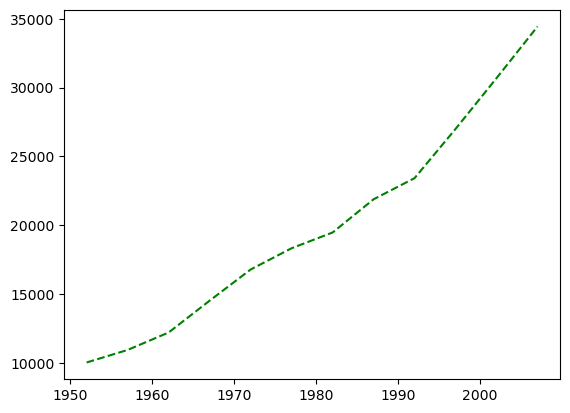

In [31]:
# Calling matplotlib.pyplot directly

# plt.plot(x, y) like above
    # also can choose different plot styles and tweak features
        # e.g.

selected_rows = data_long['Country']=='Australia'
years = data_long.loc[selected_rows,'Year']
gdp_australia = data_long.loc[selected_rows,'GDP']

plt.plot(years, gdp_australia, linestyle='--', color='g')

# we can also use a shorthand argument:
# plt.plot(years, gdp_australia, fmt='g--')

# more brief
# plt.plot(years, gdp_australia, 'g--')


Text(0, 0.5, 'GDP per capita ($)')

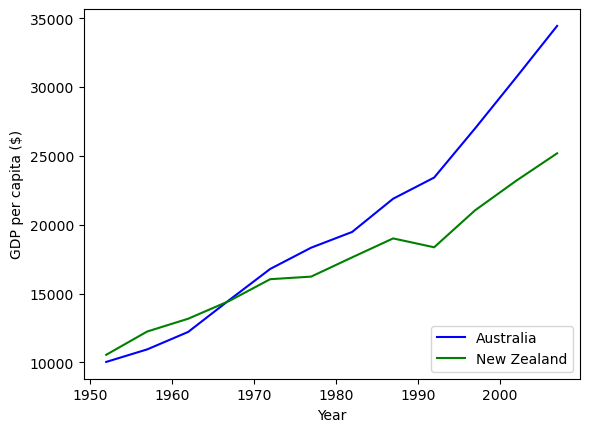

In [32]:
# combining data

# Select two countries' worth of data.

gdp_nz = data_long.loc[data_long['Country']=='New Zealand','GDP']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
#plt.legend()
plt.legend(loc='lower right') 
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')


# about legend, 
    # 2 stages to create:
        # "label" argument to label each set of data
        # create legend
            # plt.legend()
    # legend placement
        # can use "loc" argument 
            # per default, tries to find good position
                # (show this)


<Axes: xlabel='Australia', ylabel='New Zealand'>

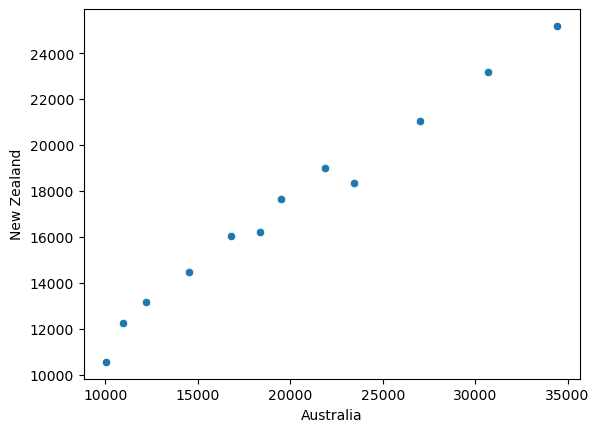

In [ ]:
# scatter plot

# other style
# plt.scatter(gdp_australia, gdp_nz)

# can be done directly from dataframe also
sns.scatterplot(data_transposed, x = 'Australia', y = 'New Zealand')


# More material!!

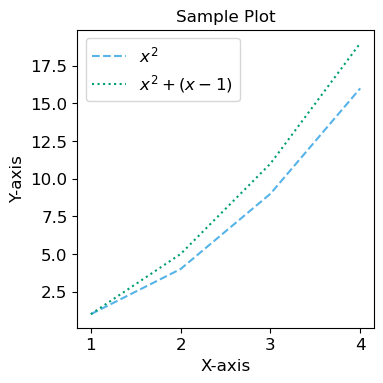

In [87]:


# To save plot
# plt.savefig('my_figure.png')

    # note MW: pdf or svg very convenient
    # note MW: also convenient:
        # plt.tight_layout() and 
        # plt.savefig('blabla.pdf', bbox_inches='tight')

# plt.savefig will use latest figure that was last displayed

    # either make sure you have the right one
    # or
    # data.plot(kind='bar')
    # fig = plt.gcf() # get current figure
    # fig.savefig('my_figure.png')

# good practice

    # make text large enough in powerpoints
         # use  fontsize parameter in xlabel, ylabel, title, and legend, and tick_params with labelsize
    # make symbols readable
        # ie large enough; "s" parameter to increase size

    # be careful with colors (only) to distinguish lines
        # use color-blind friendly palette 
            # color-blind emulators:
                # https://www.color-blindness.com/coblis-color-blindness-simulator/
                # https://colororacle.org/
        # linestyle to counter black-white printing, or marker for scatter plots

########
# good practice example:

import matplotlib.pyplot as plt

# Bang Wong colorblind-friendly color scheme (https://www.nature.com/articles/nmeth.1618)
colors_bangwong = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    "#CC79A7",  # Reddish Purple
    "#000000"   # Black
]

plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(10/2.54,10/2.54))
ax.plot([1,2,3,4], [1,4,9,16], linestyle='--', color=colors_bangwong[1], label=r'$x^2$')
ax.plot([1,2,3,4], [1,5,11,19], linestyle=':', color=colors_bangwong[2], label=r'$x^2+(x-1)$')
ax.legend()
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Sample Plot', fontsize=12)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
# plt.show()
# plt.savefig('/Users/m.wehrens/Desktop/202503_Python-Gapminder-testingcode.pdf', dpi=300, bbox_inches='tight')
# plt.close(fig)

# Some convenient code for solutions

In [23]:
# # Correlations

# # The carpentries solution is pretty elegant, but perhaps not first thing you thought of.
# data_asia = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_asia.csv', \
#     index_col='country')

# # Their solution:
# # data_asia.describe().T.plot(kind='scatter', x='min', y='max')

# # print(data_asia.head())

# data_asia.loc['max'] = data_asia.max()
# data_asia.loc['min'] = data_asia.min()

# data_asia.T.plot(x='min', y='max', kind='scatter')

# print(data_asia.loc['max'].head())

# # conclusion: there's no correlation, so "they don't rise and fall together"
#     # note: if min was low, and they would follow each other, max should be low as well
    
# ##########

# # Correlations continued

# # 'Seems the variability in this value is due to a sharp drop after 1972. 
# # Some geopolitics at play perhaps? Given the dominance of oil producing 
# # countries, maybe the Brent crude index would make an interesting comparison?
# #  Whilst Myanmar consistently has the lowest GDP, the highest GDP nation 
# # has varied more notably.'

# Random code

In [15]:
# data_europe = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_europe.csv', \
#     index_col='country')
# data_europe.min().plot(label='min')
# data_europe.max().plot(label='max')
# plt.legend(loc='best')
# plt.xticks(rotation=90)

In [22]:
# data_asia = pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_gdp_asia.csv', \
#     index_col='country')
# data_asia.describe().T.plot(kind='scatter', x='min', y='max')

In [16]:
# data_asia.describe()

In [18]:
# data_asia.loc[:,'min']
# data_asia.columns
# data_asia.index

In [19]:
# data_asia.head()

In [20]:
# print(data_asia.index)
# print(data_asia.columns)

In [21]:
# df_all = \
#     pd.read_csv('/Users/m.wehrens/Data_UVA/2024_teaching/2025-03-gapminder/data/gapminder_all.csv', index_col='country')

# df_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007', s=df_all['pop_2007']/1e6)
# plt.text(df_all.loc['United States','gdpPercap_2007'], df_all.loc['United States','lifeExp_2007'], 'United States')
# plt.text(df_all.loc['Netherlands','gdpPercap_2007'], df_all.loc['Netherlands','lifeExp_2007'], 'Netherlands')
